<a href="https://colab.research.google.com/github/samuelcasaril/python/blob/main/Extract%20From%20CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessário UPLOAD do arquivo:
<br>
* ***worldometer_data.csv***

Este arquivo contem colunas e linhas acerca dos dados da covid, por países.<br>
***Pode ser usado como base para manipulação e extração de outras planilhas***

<br> Neste código, é usado para obter:
 * Mortes por Casos
 * Mortes por População (Valores aproximados)
 * Taxa de Letalidade (Epidemia em Curso)
 * Taxa de Letalidade (Pós Epidemia)
 * Analises Estatisticas entre o que mais teve mortes, o que menos teve e o Brasil
 * Analises Estatisticas entre os TOP 08 casos de covid no mundo.

OBS: 
* Este código utiliza a busca automatica de colunas e linhas.
* Compile somente pelo COLAB, devido aos espaçamentos serem testados somente no colab.
* Caso o valor de Mortes/População seja de 0,0%, o motivo é de que excedeu 8 casas decimais após a virgula (Exemplo: 0,00000001) suportadas pelo compilador. Foi aproximado e arrendondado pela função ROUND para fácil visualização.
* Inicialmente a tabela abrangia o TOP 10, mas alguns países estavam sem dados, teve que ser reduzido pra TOP 8.



In [ ]:
# código para importar arquivos CSV no colab
print("Selecione no botão abaixo o arquivos utilizado neste trabalho, para efetuar o upload:")
print("|")
print("|   - worldometer_data.csv")
print("V")

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

lista1 = pd.read_csv(io.StringIO(uploaded['worldometer_data.csv'].decode('utf-8')),encoding='ISO-8859-1')

Selecione no botão abaixo o arquivos utilizado neste trabalho, para efetuar o upload:
|
|   - worldometer_data.csv
V


Saving worldometer_data.csv to worldometer_data.csv


In [ ]:
import math

# atribuindo colunas do arquivo: worldometer_data.csv para listas
paises_lt1 = lista1["Country/Region"]
popula_lt1 = lista1["Population"]
casos_lt1 = lista1["TotalCases"]
mortes_lt1 = lista1["TotalDeaths"]
ativos_lt1 = lista1["ActiveCases"]
testes_lt1 = lista1["TotalTests"]
recuperados_lt1 = lista1["TotalRecovered"]

# zerei a variavel que vai receber valores por comparação (maior que), vai comparar e receber na mesma variavel
num_mais_mortes = 0 


# pais com caso(s) e mais mortes
for n in range(len(mortes_lt1)):
    if num_mais_mortes < mortes_lt1[n] and casos_lt1[n] > 0 :
        num_mais_mortes = mortes_lt1[n]
        nome_mais_mortes = paises_lt1[n]
        num_mais_populacao = popula_lt1[n]
        nome_menos_mortes = paises_lt1[n]
        casos_mais = casos_lt1[n]

# atribui o valor de mais mortos de um pais na variavel de menos mortos, pra poder iniciar a compararação dos menores que esse valor, vai comparar e receber na mesma variavel
num_menos_mortes = num_mais_mortes 

# pais com caso(s) e menos mortes
for n in range(len(mortes_lt1)):
    if num_menos_mortes > mortes_lt1[n] and casos_lt1[n] > 0 : 
        num_menos_mortes = mortes_lt1[n]
        nome_menos_mortes = paises_lt1[n]
        num_menos_populacao = popula_lt1[n] 
        casos_menos = casos_lt1[n] 

#extraindo porcentagens (mortes x populacao & mortes x contaminados)
porc_mais_mortos_populacao = (num_mais_mortes/num_mais_populacao)*100
porc_menos_mortos_populacao = (num_menos_mortes/num_menos_populacao)*100
porc_mais_mortos_contaminados = (num_mais_mortes/casos_mais)*100
porc_menos_mortos_contaminados = (num_menos_mortes/casos_menos)*100

# imprimindo dados mais mortes, menos mortes e do Brasil <3
print("Dados rápidos dos Países com Mais Mortes , Menos Mortes e Brasil \n")
print("País com mais mortes: ",nome_mais_mortes,"|","Total de mortes: ",num_mais_mortes,"|","População: ",num_mais_populacao,"Pessoas")
print("Casos Confirmados: ",casos_mais,"|","Mortos/contaminados: ~", round(porc_mais_mortos_contaminados,2),"%","|","Mortos/população: ~", round(porc_mais_mortos_populacao,2),"%")
print("\n")
print("País com menos mortes: ",nome_menos_mortes,"|","Total de mortes: ",num_menos_mortes,"|","População: ",num_menos_populacao,"Pessoas")
print("Casos Confirmados: ",casos_menos,"|","Mortos/contaminados: ~", round(porc_menos_mortos_contaminados,2),"%","|","Mortos/população: ~", round(porc_menos_mortos_populacao,2),"%")
print("\n")

# pesquisa uma linha pelo nome, dentro de uma coluna tambem pesquisada pelo nome
linha_brasil = lista1.loc[lista1["Country/Region"]=="Brazil"]

# aqui vamos atribuir os valores de 1 linha no caso a linha "Brasil", cada item da coluna daquela unica linha, atribuida a uma variavel
nome_brasil = linha_brasil["Country/Region"]
populacao_brasil = linha_brasil["Population"]
casos_brasil = linha_brasil["TotalCases"]
mortes_brasil = linha_brasil["TotalDeaths"]
# ele criou a lista nesse formato [n° do indice (linha) , dado dentro da coluna]

# aqui vamos saber a porcentagem mortos/casos e mortos/populacao
porc_mortos_brasil_populacao = (mortes_brasil/populacao_brasil)*100
porc_mortos_brasil_contaminados = (mortes_brasil/casos_brasil)*100

# imprimindo dados do nosso pais
print("Nosso País: ",nome_brasil[1],"|","Total de mortes: ",mortes_brasil[1],"|","População: ",populacao_brasil[1],"Pessoas")
print("Casos Confirmados: ",casos_brasil[1],"|","Mortos/contaminados: ~", round(porc_mortos_brasil_contaminados[1],2),"%","|","Mortos/população: ~", round(porc_mortos_brasil_populacao[1],2),"%")

# Aqui vamos usar a metodologia do artigo que está no trabalho "


# Imprimindo tabela TOP 8 dos mais casos, usando a função format da string para dar os espaçamentos corretos. Para o bom funcionamento é interessante somente usar no COLAB
print("\n")
print("           ----> TOP 8 Paises do Mundo com mais pessoas contaminadas <----")
print("\n")
print("------- Legenda --------")
print(" PC = Pandemia em Curso ")
print(" PP = Pós Pandemia")
print("------------------------")
print("\n")

#head da tabela {
linha_tabhead1 = ["---","---","---","---","---","---","---","---","---"]
print("{:^15}   {:^9}   {:^9}   {:^11}   {:^15}   {:^11}   {:^16}   {:^30}   {:^26}".format(*linha_tabhead1))

linha_tabhead2 = ["Nome do País","Casos","Mortes","Recuperados","Mortes/Casos (%)","Populacao","Mortes/Populacao (%)","Taxa de Letalidade PC (%)","Taxa de Letalidade PP (%)","Taxa de Infecção"]
print("{:^15}   {:^9}   {:^9}   {:^11}   {:^15}   {:^11}   {:^16}   {:^25}   {:^25}".format(*linha_tabhead2))

linha_tabhead3 = ["---","---","---","---","---","---","---","---","---"]
print("{:^15}   {:^9}   {:^9}   {:^11}   {:^15}   {:^11}   {:^16}   {:^30}   {:^26}".format(*linha_tabhead3))
print("\n")
#}

# Taxa de Mortalidade por Caso ; Taxa de Letalidade PC (durante a pandemia) ; Taxa de Letalidade PP (pós pandemia)
# Vamos metodologia de calculos do informe cientifico "Como estimar a mortalidade pela doença do novo coronavírus (COVID-19)""
# da Organização Pan Americana de Saúde e da OMS (link do arquivo nas referencias)"

#linha1 da tabela
linha_tab0 = [paises_lt1[0],casos_lt1[0],mortes_lt1[0],recuperados_lt1[0],round((mortes_lt1[0]/casos_lt1[0])*100,2),popula_lt1[0],round((mortes_lt1[0]/popula_lt1[0])*100,2),round((mortes_lt1[0]/(mortes_lt1[0]+recuperados_lt1[0]))*100,2),round((mortes_lt1[0]/casos_lt1[0])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab0))

#linha2 da tabela
linha_tab1 = [paises_lt1[1],casos_lt1[1],mortes_lt1[1],recuperados_lt1[1],round((mortes_lt1[1]/casos_lt1[1])*100,2),popula_lt1[1],round((mortes_lt1[1]/popula_lt1[1])*100,2),round((mortes_lt1[1]/(mortes_lt1[1]+recuperados_lt1[1]))*100,2),round((mortes_lt1[1]/casos_lt1[1])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab1))

#linha3 da tabela
linha_tab2 = [paises_lt1[2],casos_lt1[2],mortes_lt1[2],recuperados_lt1[2],round((mortes_lt1[2]/casos_lt1[2])*100,2),popula_lt1[2],round((mortes_lt1[2]/popula_lt1[2])*100,2),round((mortes_lt1[2]/(mortes_lt1[2]+recuperados_lt1[2]))*100,2),round((mortes_lt1[2]/casos_lt1[2])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab2))

#linha4 da tabela
linha_tab3 = [paises_lt1[3],casos_lt1[3],mortes_lt1[3],recuperados_lt1[3],round((mortes_lt1[3]/casos_lt1[3])*100,2),popula_lt1[3],round((mortes_lt1[3]/popula_lt1[3])*100,2),round((mortes_lt1[3]/(mortes_lt1[3]+recuperados_lt1[3]))*100,2),round((mortes_lt1[3]/casos_lt1[3])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab3))

#linha5 da tabela
linha_tab4 = [paises_lt1[4],casos_lt1[4],mortes_lt1[4],recuperados_lt1[4],round((mortes_lt1[4]/casos_lt1[4])*100,2),popula_lt1[4],round((mortes_lt1[4]/popula_lt1[4])*100,2),round((mortes_lt1[4]/(mortes_lt1[4]+recuperados_lt1[4]))*100,2),round((mortes_lt1[4]/casos_lt1[4])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab4))

#linha6 da tabela
linha_tab5 = [paises_lt1[5],casos_lt1[5],mortes_lt1[5],recuperados_lt1[5],round((mortes_lt1[5]/casos_lt1[5])*100,2),popula_lt1[5],round((mortes_lt1[5]/popula_lt1[5])*100,2),round((mortes_lt1[5]/(mortes_lt1[5]+recuperados_lt1[5]))*100,2),round((mortes_lt1[5]/casos_lt1[5])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab5))

#linha7 da tabela
linha_tab6 = [paises_lt1[6],casos_lt1[6],mortes_lt1[6],recuperados_lt1[6],round((mortes_lt1[6]/casos_lt1[6])*100,2),popula_lt1[6],round((mortes_lt1[6]/popula_lt1[6])*100,2),round((mortes_lt1[6]/(mortes_lt1[6]+recuperados_lt1[6]))*100,2),round((mortes_lt1[6]/casos_lt1[6])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab6))

#linha8 da tabela
linha_tab7 = [paises_lt1[7],casos_lt1[7],mortes_lt1[7],recuperados_lt1[7],round((mortes_lt1[7]/casos_lt1[7])*100,2),popula_lt1[7],round((mortes_lt1[7]/popula_lt1[7])*100,0),round((mortes_lt1[7]/(mortes_lt1[7]+recuperados_lt1[7]))*100,2),round((mortes_lt1[7]/casos_lt1[7])*100,2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15,.2f}   {:^11.0f}   {:^16,.2f}   {:^28,.2f}   {:^25,.2f}".format(*linha_tab7))

linha_tabback1 = ["___","___","___","___","___","___","___","___","___"]
print("{:^15}   {:^9}   {:^9}   {:^11}   {:^15}   {:^11}   {:^16}   {:^28}   {:^25}".format(*linha_tabback1))
print("\n")

# calculo da média (aqui foi efetuado a media variavel por variavel)
linha_tabback2 = ["Média (~):",round(((casos_lt1[0]+casos_lt1[1]+casos_lt1[2]+casos_lt1[3]+casos_lt1[4]+casos_lt1[5]+casos_lt1[6]+casos_lt1[7])/8),0),round(((mortes_lt1[0]+mortes_lt1[1]+mortes_lt1[2]+mortes_lt1[3]+mortes_lt1[4]+mortes_lt1[5]+mortes_lt1[6]+mortes_lt1[7])/8),0),round(((recuperados_lt1[0]+recuperados_lt1[1]+recuperados_lt1[2]+recuperados_lt1[3]+recuperados_lt1[4]+recuperados_lt1[5]+recuperados_lt1[6]+recuperados_lt1[7])/8),0),round(((((mortes_lt1[0]/casos_lt1[0])*100)+((mortes_lt1[1]/casos_lt1[1])*100)+((mortes_lt1[2]/casos_lt1[2])*100)+((mortes_lt1[3]/casos_lt1[3])*100)+((mortes_lt1[4]/casos_lt1[4])*100)+((mortes_lt1[5]/casos_lt1[5])*100)+((mortes_lt1[6]/casos_lt1[6])*100)+((mortes_lt1[7]/casos_lt1[7])*100))/8),2),round(((popula_lt1[0]+popula_lt1[1]+popula_lt1[2]+popula_lt1[3]+popula_lt1[4]+popula_lt1[5]+popula_lt1[6]+popula_lt1[7])/8),0),round(((((mortes_lt1[0]/popula_lt1[0])+(mortes_lt1[1]/popula_lt1[1])+(mortes_lt1[2]/popula_lt1[2])+(mortes_lt1[3]/popula_lt1[3])+(mortes_lt1[4]/popula_lt1[4])+(mortes_lt1[5]/popula_lt1[5])+(mortes_lt1[6]/popula_lt1[6])+(mortes_lt1[7]/popula_lt1[7]))/8)*100),2),round(((((mortes_lt1[0]/(mortes_lt1[0]+recuperados_lt1[0]))+(mortes_lt1[1]/(mortes_lt1[1]+recuperados_lt1[1]))+(mortes_lt1[2]/(mortes_lt1[2]+recuperados_lt1[2]))+(mortes_lt1[3]/(mortes_lt1[3]+recuperados_lt1[3]))+(mortes_lt1[4]/(mortes_lt1[4]+recuperados_lt1[4]))+(mortes_lt1[5]/(mortes_lt1[5]+recuperados_lt1[5]))+(mortes_lt1[6]/(mortes_lt1[6]+recuperados_lt1[6]))+(mortes_lt1[7]/(mortes_lt1[7]+recuperados_lt1[7])))/8)*100),2),round(((((mortes_lt1[0]/casos_lt1[0])+(mortes_lt1[1]/casos_lt1[1])+(mortes_lt1[2]/casos_lt1[2])+(mortes_lt1[3]/casos_lt1[3])+(mortes_lt1[4]/casos_lt1[4])+(mortes_lt1[5]/casos_lt1[5])+(mortes_lt1[6]/casos_lt1[6])+(mortes_lt1[7]/casos_lt1[7]))/8)*100),2)]
print("{:^15}   {:^9.0f}   {:^9.0f}   {:^11.0f}   {:^15.2f}   {:^11.0f}   {:^16.2f}   {:^28.2f}   {:^25.2f}".format(*linha_tabback2))

# calculo do Desvio Padrão (já aqui foi efetuado o DP cruzando calculos via indices #outro nivel)
linha_tabback3= ["DP (~)","-","-","-",math.sqrt((((linha_tab0[4]-linha_tabback2[4])*(linha_tab0[4]-linha_tabback2[4])+(linha_tab1[4]-linha_tabback2[4])*(linha_tab1[4]-linha_tabback2[4])+(linha_tab2[4]-linha_tabback2[4])*(linha_tab2[4]-linha_tabback2[4])+(linha_tab3[4]-linha_tabback2[4])*(linha_tab3[4]-linha_tabback2[4])+(linha_tab4[4]-linha_tabback2[4])*(linha_tab4[4]-linha_tabback2[4])+(linha_tab5[4]-linha_tabback2[4])*(linha_tab5[4]-linha_tabback2[4])+(linha_tab6[4]-linha_tabback2[4])*(linha_tab6[4]-linha_tabback2[4])+(linha_tab7[4]-linha_tabback2[4])*(linha_tab7[4]-linha_tabback2[4]))/8)),"-",math.sqrt((((linha_tab0[6]-linha_tabback2[6])*(linha_tab0[6]-linha_tabback2[6])+(linha_tab1[6]-linha_tabback2[6])*(linha_tab1[6]-linha_tabback2[6])+(linha_tab2[6]-linha_tabback2[6])*(linha_tab2[6]-linha_tabback2[6])+(linha_tab3[6]-linha_tabback2[6])*(linha_tab3[6]-linha_tabback2[6])+(linha_tab4[6]-linha_tabback2[6])*(linha_tab4[6]-linha_tabback2[6])+(linha_tab5[6]-linha_tabback2[6])*(linha_tab5[6]-linha_tabback2[6])+(linha_tab6[6]-linha_tabback2[6])*(linha_tab6[6]-linha_tabback2[6])+(linha_tab7[6]-linha_tabback2[6])*(linha_tab7[6]-linha_tabback2[6]))/8)),math.sqrt((((linha_tab0[7]-linha_tabback2[7])*(linha_tab0[7]-linha_tabback2[7])+(linha_tab1[7]-linha_tabback2[7])*(linha_tab1[7]-linha_tabback2[7])+(linha_tab2[7]-linha_tabback2[7])*(linha_tab2[7]-linha_tabback2[7])+(linha_tab3[7]-linha_tabback2[7])*(linha_tab3[7]-linha_tabback2[7])+(linha_tab4[7]-linha_tabback2[7])*(linha_tab4[7]-linha_tabback2[7])+(linha_tab5[7]-linha_tabback2[7])*(linha_tab5[7]-linha_tabback2[7])+(linha_tab6[7]-linha_tabback2[7])*(linha_tab6[7]-linha_tabback2[7])+(linha_tab7[7]-linha_tabback2[7])*(linha_tab7[7]-linha_tabback2[7]))/8)),math.sqrt((((linha_tab0[8]-linha_tabback2[8])*(linha_tab0[8]-linha_tabback2[8])+(linha_tab1[8]-linha_tabback2[8])*(linha_tab1[8]-linha_tabback2[8])+(linha_tab2[8]-linha_tabback2[8])*(linha_tab2[8]-linha_tabback2[8])+(linha_tab3[8]-linha_tabback2[8])*(linha_tab3[8]-linha_tabback2[8])+(linha_tab4[8]-linha_tabback2[8])*(linha_tab4[8]-linha_tabback2[8])+(linha_tab5[8]-linha_tabback2[8])*(linha_tab5[8]-linha_tabback2[8])+(linha_tab6[8]-linha_tabback2[8])*(linha_tab6[8]-linha_tabback2[8])+(linha_tab7[8]-linha_tabback2[8])*(linha_tab7[8]-linha_tabback2[8]))/8))]
print("{:^15}   {:^9}   {:^9}   {:^11}   {:^15.2f}   {:^11}   {:^16.2f}   {:^28.2f}   {:^25.2f}".format(*linha_tabback3))

# comentarios/legendas
print("\n")
print("A Taxa de letalidade PC é a proporção de indivíduos diagnosticados com uma determinada doença que morrem dessa doença e,")
print("portanto, é uma medida de gravidade em meio aos casos detectados. \n")
print("A Taxa de letalidade PP fornece uma estimativa de proporção de mortes influenciada por atrasos nas datas de notificação")
print("de casos e mortes, de uma epidemia, que tende a uma estimativa final estável da taxa de letalidade à medida que os casos ativos são resolvidos.")

# Referências #

# Pesquisar coluna do CSV por nome: < Aula 19/10/2021 do Marcel Grando (Estatista e Algoritmos - UNOESC) >
# Pesquisar linha por nome, de uma coluna por nome: <https://www.youtube.com/watch?v=6M0PUNw7faE>
# Format String: < https://pt.stackoverflow.com/questions/308346/como-imprimir-as-informa%C3%A7%C3%B5es-no-formato-de-tabela-em-python >
# Informe Cientifico "Como estimar a mortalidade pela doença do novo coronavírus (COVID-19): < https://iris.paho.org/bitstream/handle/10665.2/52650/OPASWBRACOVID-1920110_por%20%281%29.pdf?sequence=1&isAllowed=y >  
# Base do código feito com o exercicio 5 da última prova A1 de (Estatista e Algoritmos - UNOESC).

# Créditos

# Código em Python feito por Samuel

# Feliz Natal, Férias e Próspero ano novo. 
# Agradecemos os ensinamentos de Python/Estatistica.

Dados rápidos dos Países com Mais Mortes , Menos Mortes e Brasil 

País com mais mortes:  USA | Total de mortes:  162804.0 | População:  331198130.0 Pessoas
Casos Confirmados:  5032179 | Mortos/contaminados: ~ 3.24 % | Mortos/população: ~ 0.05 %


País com menos mortes:  Burundi | Total de mortes:  1.0 | População:  11922216.0 Pessoas
Casos Confirmados:  395 | Mortos/contaminados: ~ 0.25 % | Mortos/população: ~ 0.0 %


Nosso País:  Brazil | Total de mortes:  98644.0 | População:  212710692.0 Pessoas
Casos Confirmados:  2917562 | Mortos/contaminados: ~ 3.38 % | Mortos/população: ~ 0.05 %


           ----> TOP 8 Paises do Mundo com mais pessoas contaminadas <----


------- Legenda --------
 PC = Pandemia em Curso 
 PP = Pós Pandemia
------------------------


      ---            ---         ---          ---             ---             ---             ---                       ---                            ---            
 Nome do País       Casos      Mortes     Recuperados   Mortes/C

* gráficos gerados pela saída dos dados da compilação

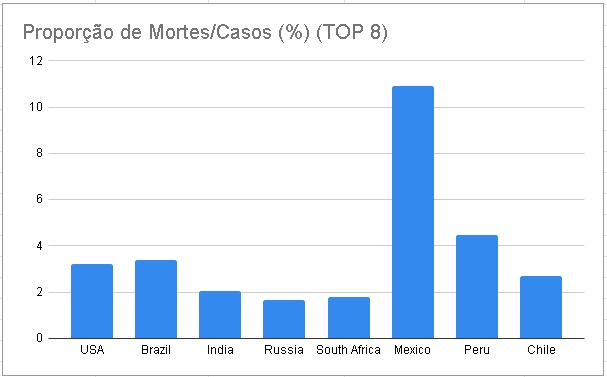

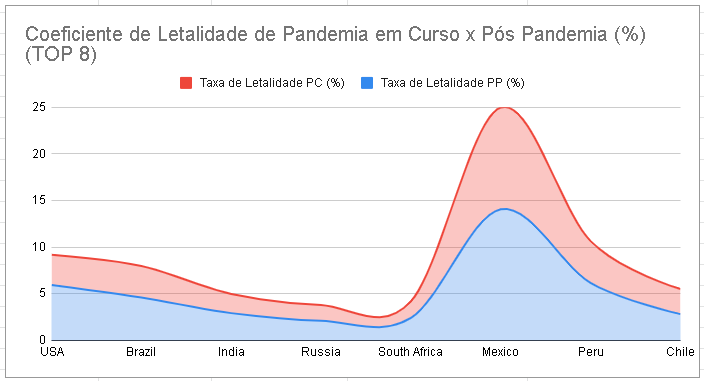

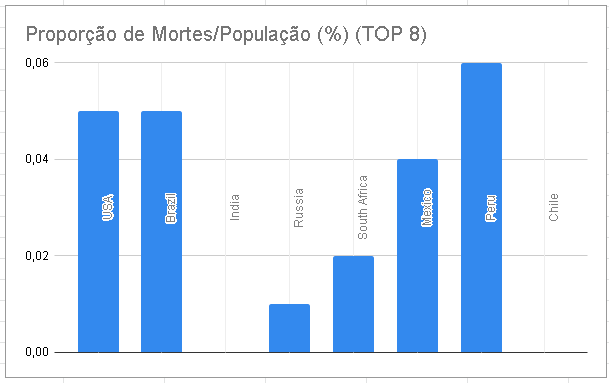

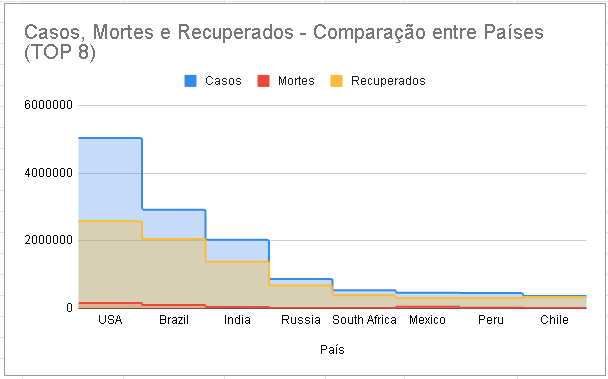